In [1]:
import torch
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from utils.dataset_loader import get_data_transform
from models.resnet_model import get_resnet18

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

_, test_loader = get_data_transform("data/train", "data/test", batch_size=8)
model = get_resnet18().to(device)
model.load_state_dict(torch.load("cat_dog_model.pth", map_location=device))
model.eval()

In [5]:
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [6]:
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=["cat", "dog"]))

Classification Report:

              precision    recall  f1-score   support

         cat       1.00      1.00      1.00        10
         dog       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



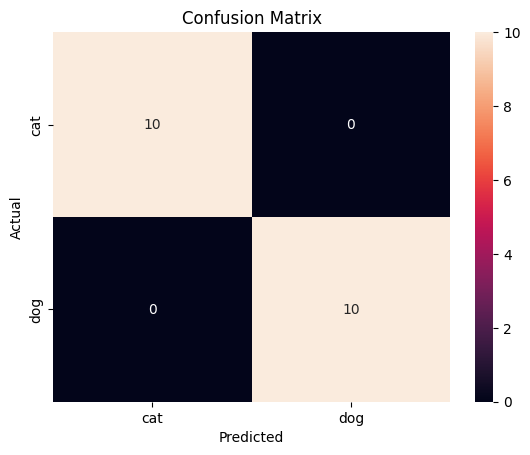

In [7]:
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["cat", "dog"], yticklabels=["cat", "dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [8]:
acc = (torch.tensor(all_preds) == torch.tensor(all_labels)).float().mean()
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00
